# Fourier Transforms

___

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Problem 1
___

The Fourier coefficients that the `numpy.fft` package returns for $k = 0,\dots,N-1$ are 
$$C_{k} = \sum_{j = 0}^{N-1} f_{j}e^{-i2\pi kj/N}$$

___

### Problem 2
___

The expression that the inverse DFT that is computed by the `numpy.fft` package is:
$$f_{i} = \frac{1}{N}\sum^{N-1}_{k = 0} c_{k}e^{i2\pi kj/N}$$

___

### Problem 3

If the $f_i$ for $j = 0,1,\dots,N-1$ are real numbers we have for $c_{0}$:
$$c_{0} =\sum^{N-1}_{k = 0} c_{k}e^{i2\pi (0)j/N}  = \sum_{j = 0}^{N-1}f_{j}$$
Since it is given that $f_i$ is real on  $j = 0,1,\dots,N-1$, then $c_0$ is real by above.

Now for $c_{N-k}$ we have:
$$c_{N-k} = \sum_{j = 0}^{N-1} f_{j}e^{-i2\pi (N-k)j/N} = \sum_{j = 0}^{N-1} f_{j}e^{-i2\pi (N)j/N}e^{-i2\pi (-k)j/N} = 
\sum_{j = 0}^{N-1}f_{j}e^{-i2\pi j}e^{i2\pi (k)j/N} = \sum_{j = 0}^{N-1}f_{j}e^{i2\pi kj/N} = \bar{c}_{k}$$
This is from the fact that $e^{-i2\pi j} = 1$ for all $j \in \mathbb{Z}$.
Thus the desired statement has been proven.

___

### Problem 4
Note that for $c_k$ we have the formula:
$$c_k = \sum^{N-1}_{j=0}f_{j}e^{-i2\pi kj/N}$$
Thus we can expand this with euler's formula as:
$$c_k =  \sum^{N-1}_{j=0} \frac{2}{N}f_j \left[\cos(kx_j)-i\sin(kx_j)\right]$$
Now if we split it up as:
$$c_k =  \sum^{N-1}_{j=0} \frac{2}{N}f_j\cos(kx_j)-\sum^{N-1}_{j=0} \frac{2}{N}if_j\cos(kx_j)\sin(kx_j)$$
We have:
$$c_k = \frac{N}{2}(a_k - ib_k)$$
Thus from $c_k$ we have $a_k$ is the real part of $c_k$ and then $b_k$ is the complex part on $k=1,\dots, \frac{N}{2} -1$

The caveat here however is that there are the special cases for $c_k$ where $k = 0$, and $k = \frac{N}{2}$, thus we need to find the relation for those values of K.

For $k = 0$ we have $c_k = \sum_{j=0}^{N-1}f_j$, thus there is only a real part. So similarly as above we calculate that $a_0 = \frac{2}{N}c_0$.

Finally, for $k = \frac{N}{2}$ we plug in that value for $k$ into $c_k$ and similarly as above simplify to find that $c_{\frac{N}{2}} = \frac{N}{2}a_{k}$

Thus we have the final relation as

$c_k = \frac{N}{2}a_{k}$ for $k = 0, \frac{N}{2}$
$c_k = \frac{N}{2}(a_k - ib_k)$ for $k = 1, \dots, \frac{N}{2}-1$

____

### Problem 5

The code below gets the polynomial coefficients based on the $c_k$ and $N$. 

In [3]:
# Gets all of the polynomial coefficients
def get_a_k(c_k, N):
    return np.array([(2/N)*np.real(c_k[i]) for i in range(int(N/2) + 1)])

#define bk as a function that takes the imaginary part of ck
def get_b_k(c_k, N):
    return np.array([-(2/N)*np.imag(c_k[i]) for i in range(1, int(N/2))])

Here we test it out and get our coefficients for the polynomial.

In [4]:
f_j = np.array(
    [6.000000000000000,
     10.242640687119284, 
     2.000000000000000,
     -2.585786437626905, 
     2.000000000000000, 
     1.757359312880716, 
     -6.000000000000000, 
     -5.414213562373098]
)

# Constants
c_k = np.fft.fft(f_j)

# Getting Polynomial coeffs
A_k = get_a_k(c_k, 8)
B_k = get_b_k(c_k, 8)

print(A_k)
print(B_k)

[2.00000000e+00 2.00000000e+00 3.00000000e+00 7.77156117e-16
 8.88178420e-16]
[ 4.  5. -0.]


The next code below defines the polynomial in code and returns either the value at $x$ or a function which evaluates any x value for that polynomial.

In [5]:
def P_n(f_j, N, x = None, vec = False):
    c = np.fft.fft(f_j)
    a = get_a_k(c, N)
    b = get_b_k(c, N)
    
    def Poly_N(x): 
        val = (1/2)*(a[0] + a[int(N/2)]*np.cos((N/2)*x)) + \
                np.sum([a[k]*np.cos(k*x) + b[k-1]*np.sin(k*x) for k in range(1, int(N/2))])
        return val
    
    if vec and x is None:
        return Poly_N
    elif not vec and x is not None:
        return Poly_N(x)

Now we test out our code and we should get the same values the we got in the problem data thanks to the interpolation property.

In [6]:
N = 8
x_j = np.array([(i*2*np.pi)/N for i in range(N)])
P_8 = P_n(f_j, N, vec = True)    
np.vectorize(P_8)(x_j)

array([ 6.        , 10.24264069,  2.        , -2.58578644,  2.        ,
        1.75735931, -6.        , -5.41421356])

___

### Problem 6

Below we use the polynomial creation function to find the polynomial approximation of degree 8. 

In [7]:
#  The functions for this problem
f = lambda x: np.exp(np.sin(x))
df = lambda x: np.cos(x)*np.exp(np.sin(x))

# The data 
N = 8
x_j = np.array([(i*2*np.pi)/N for i in range(N)])
f_j = np.vectorize(f)(x_j)

# The polynomial
P_8 = P_n(f_j, N, vec = True)

test_pt = np.pi/2
print(P_8(test_pt))
print(f(test_pt))

2.718281828459045
2.718281828459045


Now we define the derivative of the polynomial by taking the analytic solution and creating a function much like the one before:

In [8]:
def D_P_n(f_j, N, x = None, vec = False):
    c = np.fft.fft(f_j)
    a = get_a_k(c, N)
    b = get_b_k(c, N)
    
    def D_Poly_N(x): 
        val = -(N/4)*a[int(N/2)]*np.sin((N/2)*x) + \
                np.sum([k*b[k-1]*np.cos(k*x) -k*a[k]*np.sin(k*x) for k in range(1, int(N/2))])
        return val
    
    if vec and x is None:
        return D_Poly_N
    elif not vec and x is not None:
        return D_Poly_N(x)

# The data 
N = 8
x_j = np.array([(i*2*np.pi)/N for i in range(N)])
f_j = np.vectorize(f)(x_j)

# The polynomial
D_P_8 = D_P_n(f_j, N, vec = True)

# Testing
test_pt = np.pi/4
print(D_P_8(test_pt))
print(df(test_pt))
print(x_j)

1.4375429562572413
1.434093856548958
[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714]


Here we plot the two functions against eachother:

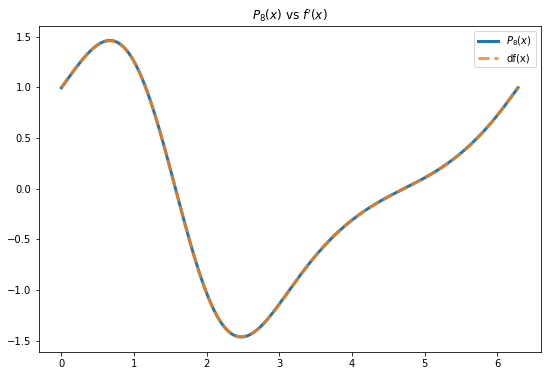

In [9]:
X = np.linspace(0,2*np.pi,1000)

plt.figure(figsize=(9,6))
plt.plot(X, np.vectorize(D_P_8)(X), linewidth = 3,label = "$P_{8}(x)$")
plt.plot(X, np.vectorize(df)(X),linewidth = 3, linestyle = "--",alpha = .8, label = "df(x)")
plt.title("$P_8(x)$ vs $f'(x)$")
plt.legend();

Now we plot the error function:

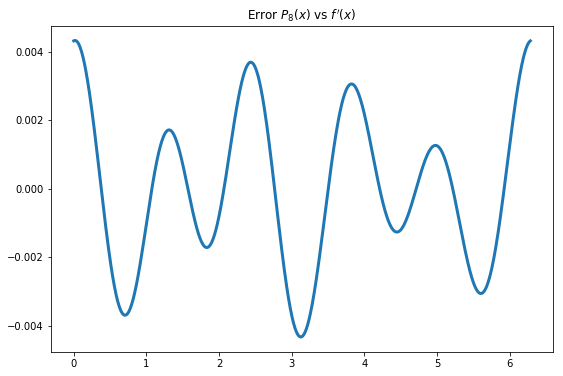

In [10]:
X = np.linspace(0,2*np.pi,1000)
e = lambda x: df(x)-D_P_8(x)
plt.figure(figsize=(9,6))
plt.plot(X, np.vectorize(e)(X), linewidth = 3)
plt.title("Error $P_8(x)$ vs $f'(x)$");

And the error at the calculated data points:

In [12]:
for i, val in enumerate(f_j):
    print("Error for x_{} = {}:({} - {})= {}\r\n".format(i, x_j[i], val, D_P_8(x_j[i]), e(x_j[i])))

Error for x_0 = 0.0:(1.0 - 0.9956820889014127)= 0.004317911098587257

Error for x_1 = 0.7853981633974483:(2.028114981647472 - 1.4375429562572413)= -0.003449099708283221

Error for x_2 = 1.5707963267948966:(2.718281828459045 - 5.908572678473254e-16)= -4.2441051082718617e-16

Error for x_3 = 2.356194490192345:(2.0281149816474726 - -1.437542956257241)= 0.003449099708282999

Error for x_4 = 3.141592653589793:(1.0000000000000002 - -0.9956820889014134)= -0.004317911098586813

Error for x_5 = 3.9269908169872414:(0.49306869139523984 - -0.3513816866267539)= 0.0027294713504026347

Error for x_6 = 4.71238898038469:(0.36787944117144233 - -4.717257565519195e-17)= -2.040578136021663e-17

Error for x_7 = 5.497787143782138:(0.49306869139523973 - 0.3513816866267537)= -0.002729471350402579



As we can see, the error is very small for each point!

___

### Problem 7
I ran out of time :-( <br>
I have failed you.